# Numpy, Matplotlib

## Inicializácia

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

<img src="./img/numpy.png" alt="Numpy logo" style="width: 250px;"/>

- Určené na **praktické**, **rýchle** a **pohodlné** riešenie matematických problémov
- Domovská stránka projektu: https://numpy.org/
- Veľmi široké využitie vo svete technických výpočtov
- V mnohých prípadoch ľudia vedia pracovať s Numpy, no čistý Python je im cudzí
    - V Numpy je prístup k riešeniu problémov skutočne rozdielny
        - Vektorizácia
        - `numpy.ndarray`
        - Typovosť polí


### Numpy.ndarray

- Základný dátový typ v Numpy
- Všetky jeho prvky majú **rovnaký typ**
- V každom rozmere musí mať každý prvok rovnakú dimenzionalitu

In [2]:
# Ak je pole v každom rozmere "plné," je všetko v poriadku
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # Vytvorenie pomocou funkcie numpy.array()

print(a)
print(type(a))
print(type(a[0]))
print(type(a[0, 0]))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.int64'>


In [3]:
# Ak ho ale kompletne nedefinujeme, môže nás výsledok prekvapiť
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8]])

print(a)
print(type(a))
print(type(a[0]))
print(type(a[0, 0]))

[list([1, 2, 3]) list([4, 5, 6]) list([7, 8])]
<class 'numpy.ndarray'>
<class 'list'>


IndexError: too many indices for array

### Zmeny tvaru poľa

- Univerzálna metóda `reshape()`

In [4]:
a = np.arange(15).reshape(3, 5) # Funkcia numpy.arange() vracia čísla od ... do ... s krokom ...

print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


- Narovnanie poľa do jednej dimenzie: `ravel()` (vracia kópiu) a `flatten()` (vracia odkaz)
    - Viac info: https://stackoverflow.com/questions/28930465/what-is-the-difference-between-flatten-and-ravel-functions-in-numpy

In [5]:
a = np.arange(15).reshape(3, 5)

print(a)
print(a.flatten())

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


### Indexovanie

- `ndarray` pozná svoju dimenzionalitu
    - Je preto možné použiť viacrozmerný index
- Čistý Python: Viacrozmerné pole je *pole polí (polí (...)*
- Numpy: Viacrozmerné pole je *viacrozmerné pole*

In [6]:
a_np = np.arange(15).reshape(3, 5)
a_py = [[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14]]

print(a_np[2, 3]) # Numpy indexovanie
print(a_py[2][3]) # Štandardné indexovanie

13
13


### Vektorizácia

- V Numpy s poliami pracujeme ako so samostatnými matematickými objektami
    - Nie ako so skupinou rôznych prvkov
    - Jednorozmerné pole $\to$ vektor
    - Dvojrozmerné pole $\to$ matica
    
- Numpy používa **univerzálne funkcie** (`ufunc`s) a **broadcasting**
    - Jednoducho povedané: Pokiaľ daná operácia má matematický zmysel, Numpy urobí všetko preto, aby bola vykonaná
    - Príklad: sčítanie

In [7]:
# + je iba aliasom pre np.add()
print(np.add(5, 6))
print(5 + 6)

# np.add() je univerzálna funkcia
a = np.arange(15).reshape(3, 5)
b = np.arange(10, 15)

print(a + 5)
print(a + b)

11
11
[[ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[10 12 14 16 18]
 [15 17 19 21 23]
 [20 22 24 26 28]]


<img src="./img/matplotlib.png" alt="Numpy logo" style="width: 250px;"/>

- Najpoužívanejší nástroj na vizualizáciu dát
- Práca s objektami `figure`, `axes`, `line`,...
- Podrobnejší popis: Úvod na prednáške, detaily https://matplotlib.org/
- Všetko snáď lepšie pochopíme na príkladoch :-)

## Príklady (Numpy + matplotlib dokopy)

### Tlmený harmonický oscilátor

Vykreslite časovú zmenu amplitúdy tlmeného harmonického oscilátora s dekrementom útlmu $\lambda = 1$ a nulovou počiatočnou fázou. Za riešenie periódy kmitov považujte $T=1~\mathrm{s}$. Maximálna amplitúda je $A=1$.

* Amplitúda kmitov: $y(t) = A\exp(-\lambda t) \cos(2\pi f t + \phi)$
    - $A$ je maximálna amplitúda
    - $\lambda$ je koeficient útlmu
    - $\phi$ je fáza v počiatku časovej osi.

<IPython.core.display.Javascript object>


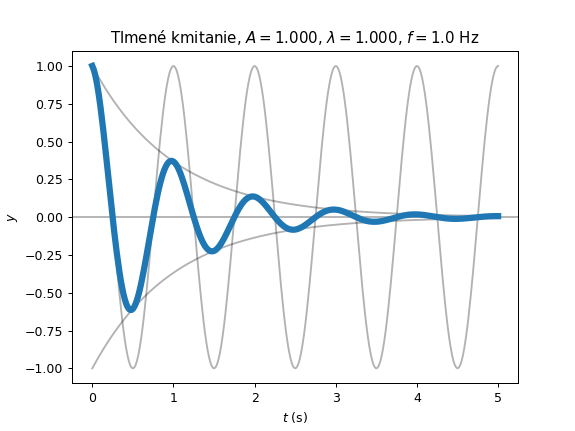

In [9]:
A = 1 # Amplitúda kmitov
lambda_ = 1 # logaritmický dekrement útlmu
phi = 0 # Počiatočná fáza
f = 1 # Frekvencia

# Výpočet uhlovej frekvencie
omega = 2 * np.pi * f

# Príprava časovej osi
t = np.linspace(0, 5, num=300)

# Výpočet 
x = np.exp(-lambda_ * t) * np.cos(omega * t + phi)
x_undamped = np.cos(omega * t + phi)
damping = np.exp(-lambda_ * t)

fig, ax = plt.subplots()

# Pomocné čiary a grafy
ax.axhline(0, color='k', alpha=.3)
ax.plot(t, x_undamped, 'k', alpha=.3)
ax.plot(t, damping, 'k', alpha=.3)
ax.plot(t, -damping, 'k', alpha=.3)

# Tlmené kmitanie
ax.plot(t, x, lw=5)

# Nadpis, popis osí
plt.title(r'Tlmené kmitanie, $A=${:.3f}, $\lambda=${:.3f}, $f={:.1f}~$Hz'.format(A, lambda_, f))
ax.set_xlabel(r'$t~(\mathrm{s})$')
ax.set_ylabel(r'$y$')

plt.show()

### Mandelbrotova množina

* Je to množina komplexných čísel $z$, pre ktoré funkcia $f(z) = z^2 + c$ pri nekonečnej iterácii počínajúcej v $z=0+0\jmath$ *konverguje*.
    * Iterácia funkcie $f$: $f(f(f(\cdots f(f(z))\cdots )))$
* Možno ju zobraziť ako obrázok
    * Istý výsek komplexnej roviny rozdelíme
    * V každom bode delenia vyhodnotíme, či je preň podmienka príslušnosti do Mandelbrotovej množiny splnená
    * Pokiaľ áno, vykreslíme príslušný pixel (alebo množinu pixelov) farbou $F_1$, pokiaľ do Mandelbrotovej množiny nepatrí, vykreslíme ho (ju) farbou $F_2$
* Vizualizácia sa dá ale urobiť ešte krajšie (i keď z hľadiska vyhodnotenia príslušnosti čísel k Mandelbrotovej množine menej informatívne):
    * Zvolíme si hodnotu prahu $t$ a hodnotu maximálneho počtu iterácií $m$.
    * Pokiaľ po $n$ iteráciach dosiahne hodnota iterovanej funkcie v čísle $z$ hodnotu $t$, prehlásime číslo $z$ za nemandelbrotovské. Priradíme mu však hodnotu $n$
    * Pokiaľ v bode $z$ ani po $m$ iteráciach nedosiahne iterovaná funkcia hodnotu $t$, priradíme číslu $z$ hodnotu $n=0$.
    * Maticu čísel $\{n\}$ pre skúmaný výsek komplexnej roviny namapujeme na farebnú škálu a vykreslíme.

<IPython.core.display.Javascript object>


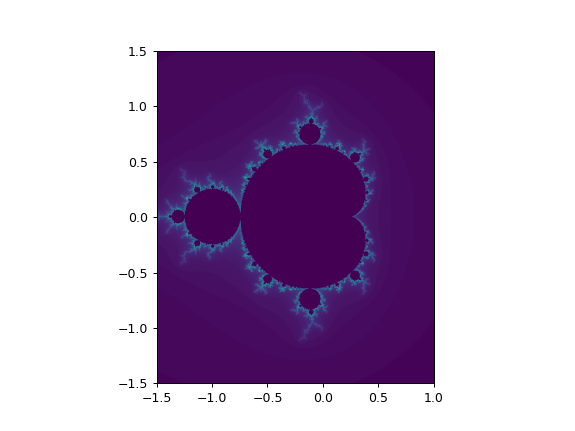

In [14]:
def mandelbrot(xlim, ylim, n_real=1000, n_imag=1000, threshold_value=3., threshold_iterations=100):
    x = np.linspace(*xlim, n_real, dtype=np.float32)
    y = np.linspace(*ylim, n_imag, dtype=np.float32)
    c = x + y.reshape(len(y), 1) * 1j # Komplexné čísla v skúmanom výseku
    n = np.zeros_like(c, dtype=int) # Počty iterácií
    z = np.zeros_like(c, dtype=np.complex64) # Medzivýsledky iterácie
    
    for i in range(threshold_iterations):
        where_less = np.less(np.abs(z), threshold_value)
        n[where_less] = i
        z[where_less] = z[where_less] ** 2 + c[where_less]
        
    n[n == threshold_iterations - 1] = 0
    # n[n != 0] = 1 # Pre binárny výstup
    
    return n

xlim = [-1.5, 1]
ylim = [-1.5, 1.5]

n = mandelbrot(xlim, ylim)

fig, ax = plt.subplots()
ax.imshow(n, extent=xlim + ylim)

plt.show()

### Manipulácia s dátami: vekové rozloženie pozitívnych testov na COVID-19 podľa krajov

* Úlohou je vykresliť tabuľku deviatich stĺpcových grafov
    * Každý z grafov bude reprezentovať jeden kraj z množiny
    
    | Názov kraja | NUTS 3 identifikátor |
    |:-----| ---- |
    | Hlavní město Praha | CZ010 |
    | Karlovarský kraj | CZ041 |
    |Ústecký kraj|CZ042|
    |Pardubický kraj|CZ053|
    |Zlínský kraj|CZ072|
    |Plzeňský kraj|CZ032|
    |Středočeský kraj|CZ020|
    |Liberecký kraj|CZ051|
    |Kraj Vysočina|CZ063|
    
    * Každý z grafov bude *histogramom* s 5 binmi, zobrazujúcim rozloženie pozitívnych prípadov v danom kraji podľa *veku*
    * Dátový súbor sa nazýva `osoby.csv`

In [11]:
data = pd.read_csv('./data/osoby.csv') # Načítanie dát
data.drop(columns=['okres_lau_kod', 'nakaza_v_zahranici', 'nakaza_zeme_csu_kod', 'pohlavi', 'datum'], inplace=True)

data.head() # Zobrazenie začiatku tabuľky

,vek,kraj_nuts_kod
0,17,CZ032
1,30,CZ010
2,42,CZ031
3,42,CZ053
4,49,CZ080


<IPython.core.display.Javascript object>


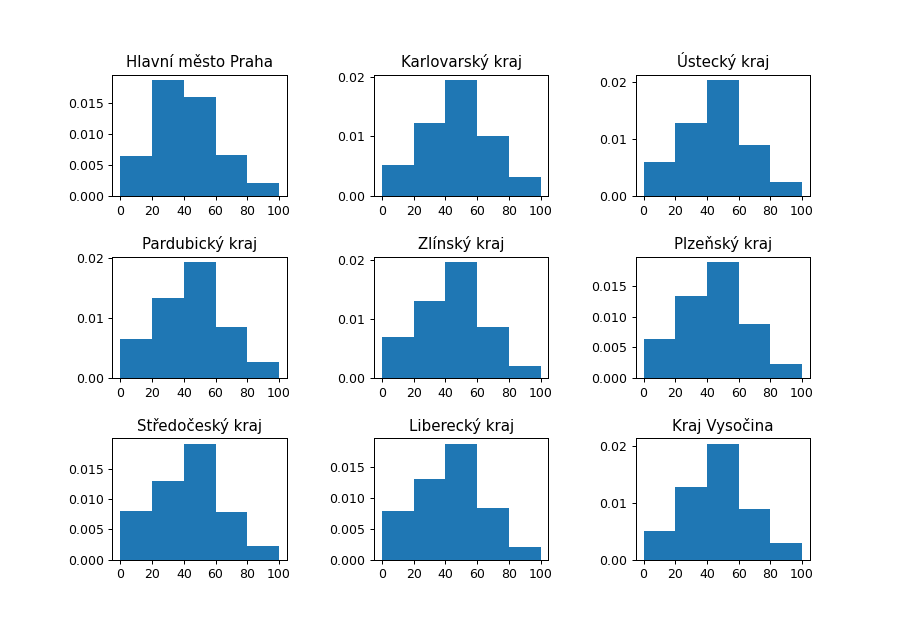

In [13]:
def age_data(nuts):
    #return data.loc[data['kraj_nuts_kod'] == nuts, 'vek']
    return data.groupby(by='kraj_nuts_kod').get_group(nuts)['vek']

nuts = ['CZ010', 'CZ041', 'CZ042', 'CZ053', 'CZ072', 'CZ032', 'CZ020', 'CZ051', 'CZ063']
names = ['Hlavní město Praha', 'Karlovarský kraj', 'Ústecký kraj', 'Pardubický kraj', 'Zlínský kraj', 'Plzeňský kraj', 'Středočeský kraj', 'Liberecký kraj', 'Kraj Vysočina']

fig, ax = plt.subplots(3, 3, figsize=(10, 7))
for r in range(3):
    for c in range(3):
        _, bins, _ = ax[r, c].hist(age_data(nuts[3 * r + c]), density=True, bins=np.arange(0, 101, 20))
        ax[r, c].set_xticks(bins)
        ax[r, c].set_title(names[3 * r + c])

plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()